# **Import  Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/kaggle/input/australia-car-market-data/cars_info.csv")
print(df.info())
print(df.isnull().sum())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB
None
ID     

# **EDA**

In [3]:
print(df.describe())

                 ID          Price          Year    Kilometers            CC  \
count  1.704800e+04   17048.000000  17048.000000  1.704800e+04  17048.000000   
mean   1.279027e+07   36777.778038   2015.481288  1.032314e+05   2491.830303   
std    5.051111e+04   30305.015328      4.721591  8.041313e+04    881.985562   
min    1.153013e+07    1000.000000   1989.000000  1.000000e+00    875.000000   
25%    1.275715e+07   18800.000000   2013.000000  4.450225e+04   1987.000000   
50%    1.280207e+07   29990.000000   2016.000000  8.845400e+04   2354.000000   
75%    1.283131e+07   45990.000000   2019.000000  1.488735e+05   2981.000000   
max    1.285246e+07  999000.000000   2022.000000  2.700000e+06   7300.000000   

       Seating Capacity  
count      17048.000000  
mean           5.115849  
std            1.121791  
min            2.000000  
25%            5.000000  
50%            5.000000  
75%            5.000000  
max           14.000000  


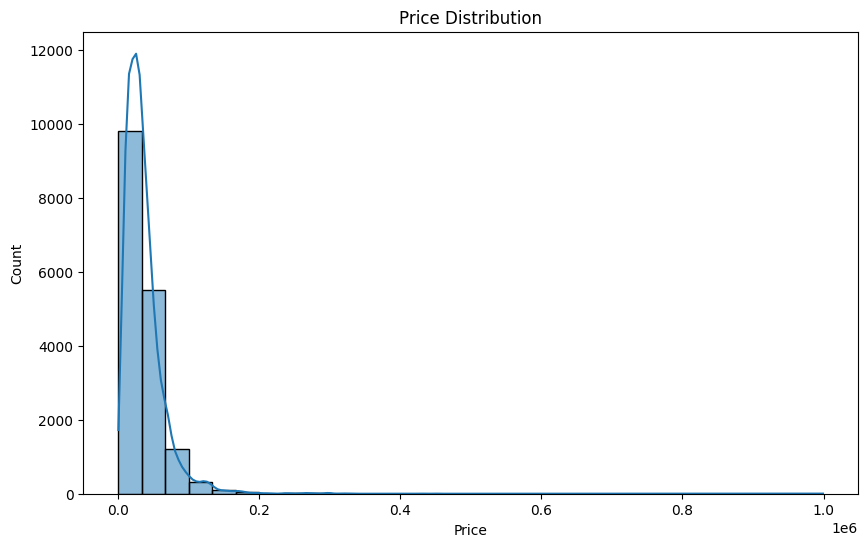

In [4]:
# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

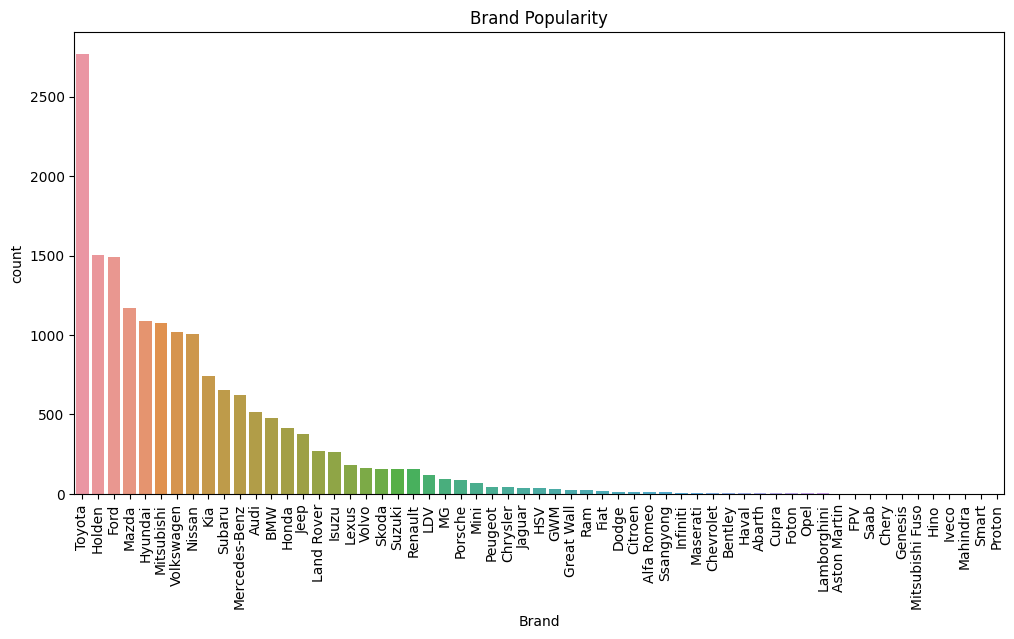

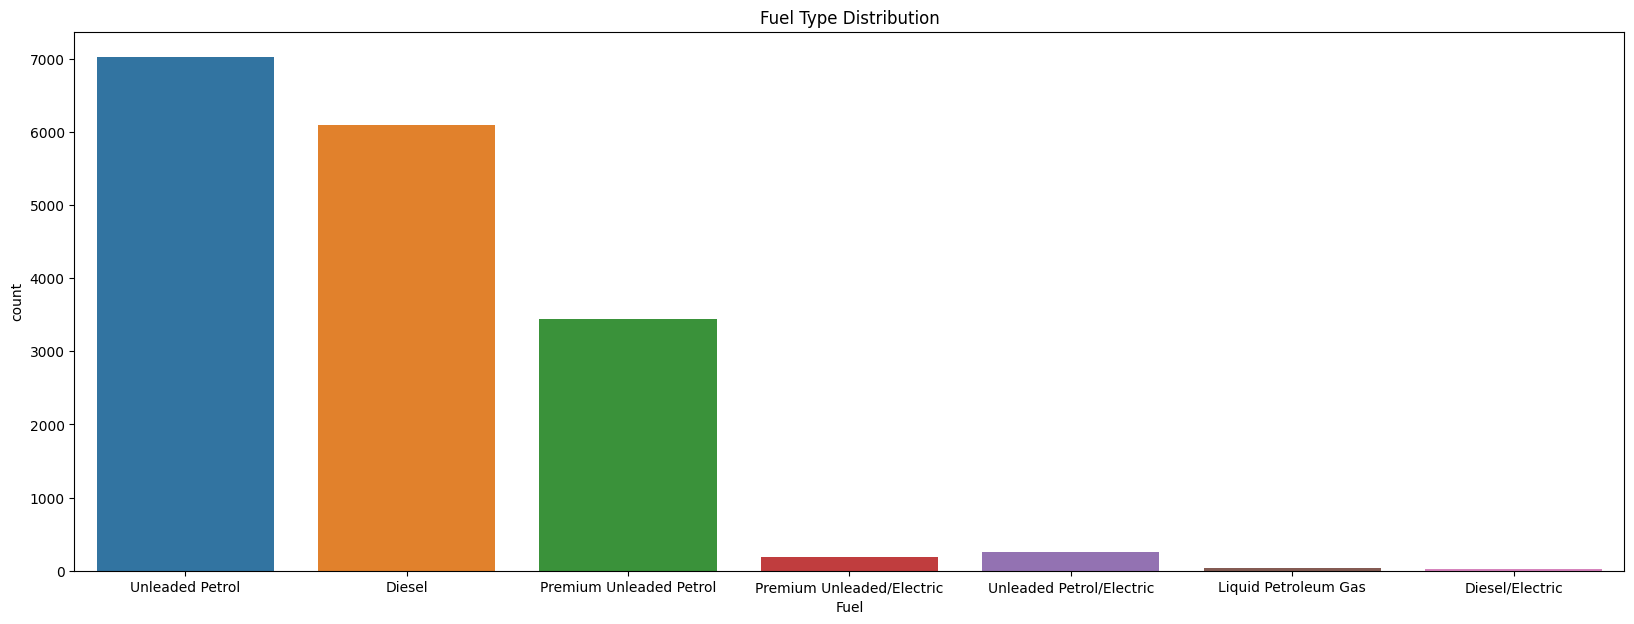

In [5]:
# Brand popularity
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Brand', order=df['Brand'].value_counts().index)
plt.title('Brand Popularity')
plt.xticks(rotation=90)
plt.show()

# Fuel type distribution
plt.figure(figsize=(20, 7))
sns.countplot(data=df, x='Fuel')
plt.title('Fuel Type Distribution')
plt.show()


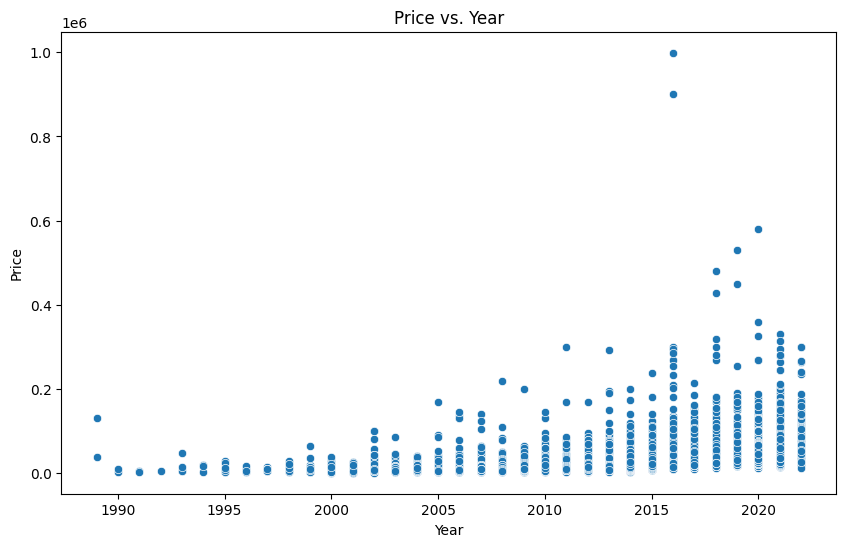

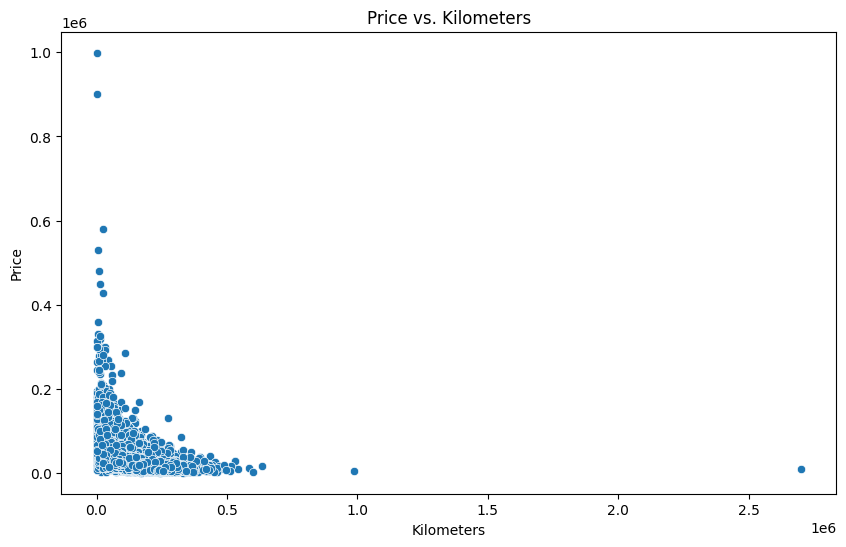

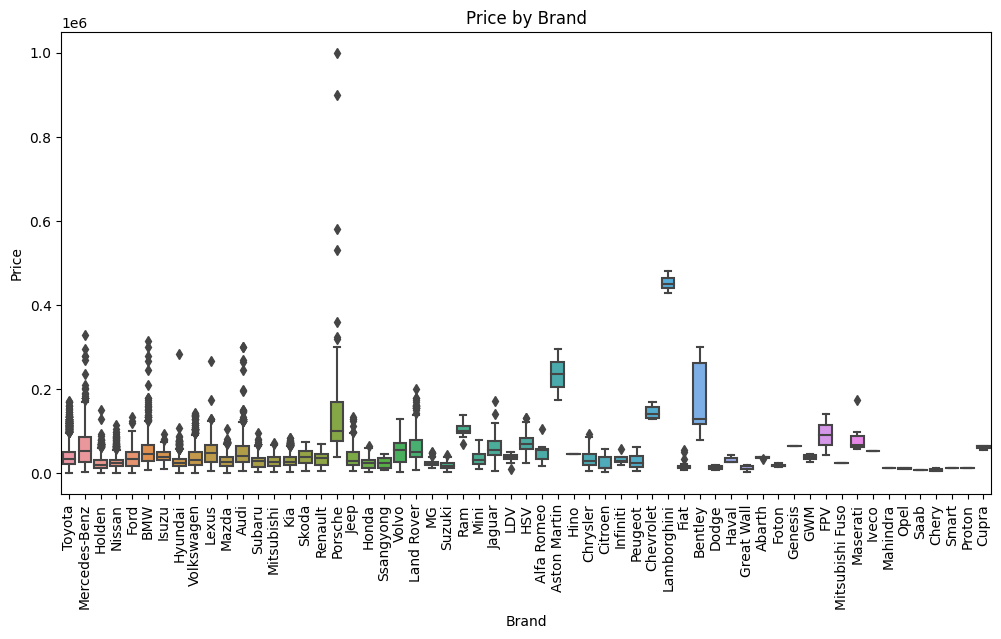

In [6]:
# Price vs. Year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Year', y='Price')
plt.title('Price vs. Year')
plt.show()

# Price vs. Kilometers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Kilometers', y='Price')
plt.title('Price vs. Kilometers')
plt.show()

# Price by Brand
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Brand', y='Price')
plt.title('Price by Brand')
plt.xticks(rotation=90)
plt.show()


In [7]:
# the conversion rate (1 AUD = 0.67 USD)
conversion_rate = 0.67

# Convert Price to USD
df['Price_USD'] = df['Price'] * conversion_rate


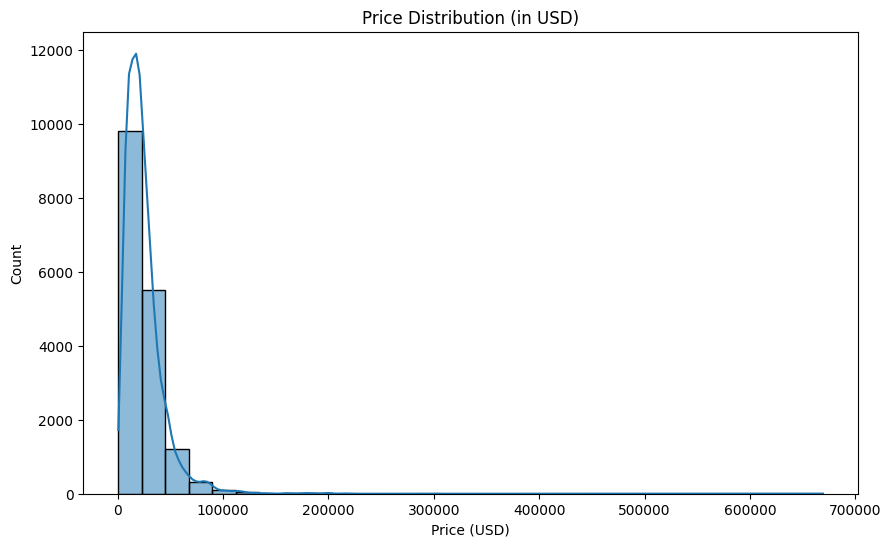

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_USD'], kde=True, bins=30)
plt.title('Price Distribution (in USD)')
plt.xlabel('Price (USD)')
plt.show()


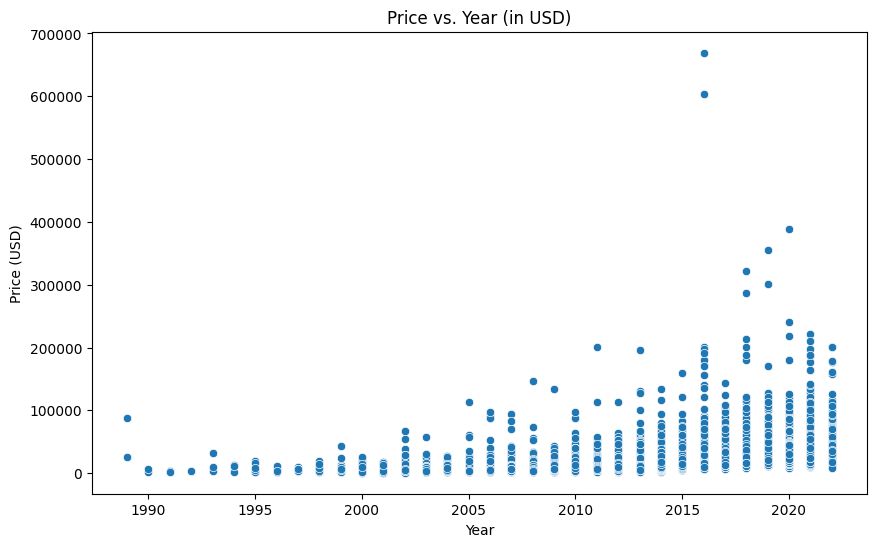

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Year', y='Price_USD')
plt.title('Price vs. Year (in USD)')
plt.ylabel('Price (USD)')
plt.show()


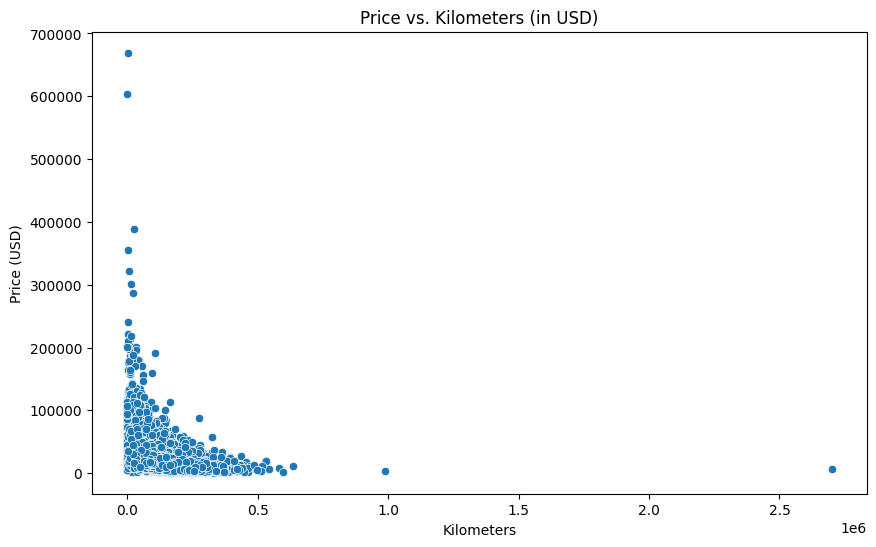

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Kilometers', y='Price_USD')
plt.title('Price vs. Kilometers (in USD)')
plt.ylabel('Price (USD)')
plt.show()


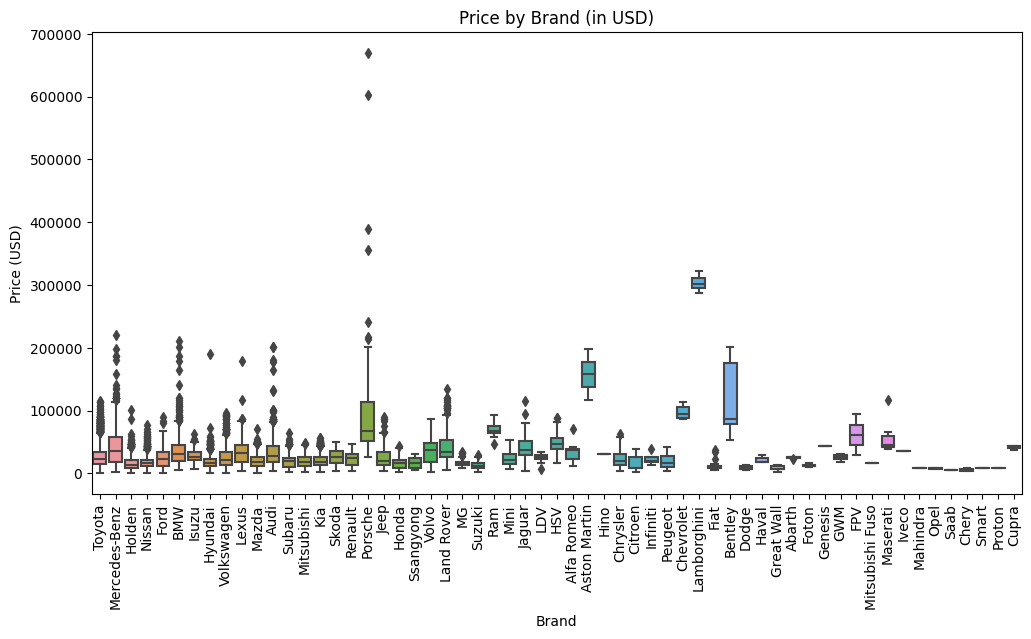

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Brand', y='Price_USD')
plt.title('Price by Brand (in USD)')
plt.ylabel('Price (USD)')
plt.xticks(rotation=90)
plt.show()


# **Preprocessing**

In [12]:
# Define categorical and numerical features
categorical_features = ['Brand', 'Model', 'Variant', 'Series', 'Type', 'Gearbox', 'Fuel', 'Status', 'Color']
numerical_features = ['Year', 'Kilometers', 'CC', 'Seating Capacity']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define the target variable and features
X = df.drop(columns=['Price', 'ID', 'Name'])  # Drop irrelevant columns
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# **Models**

* **Linear Regression**

In [13]:
# Create a pipeline with preprocessing and model
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', LinearRegression())])

# Train the model
lr_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluate the model
print("Linear Regression:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr))}")
print(f"R2 Score: {r2_score(y_test, y_pred_lr)}")


Linear Regression:
MAE: 4908.5493369967335
MSE: 214242256.41736805
RMSE: 14637.016650170486
R2 Score: 0.7436794235438943


* **Random Forest Regression**

In [14]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestRegressor(random_state=42))])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the model
print("Random Forest Regression:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf)}")


Random Forest Regression:
MAE: 4289.040748233487
MSE: 100907607.13021871
RMSE: 10045.277852315421
R2 Score: 0.8792736014783351


*The Random Forest Regressor model demonstrates strong performance with an R² score of 0.8793, indicating that it effectively explains 87.93% of the variance in car prices. The model's MAE of $4,289.04  and  RMSE of $10,045.28 suggest accurate predictions with reasonable error margins. While there is minor room for improvement, this model is robust and reliable for predicting car prices in the Australian market*